In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [3]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [4]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

<Axes: >

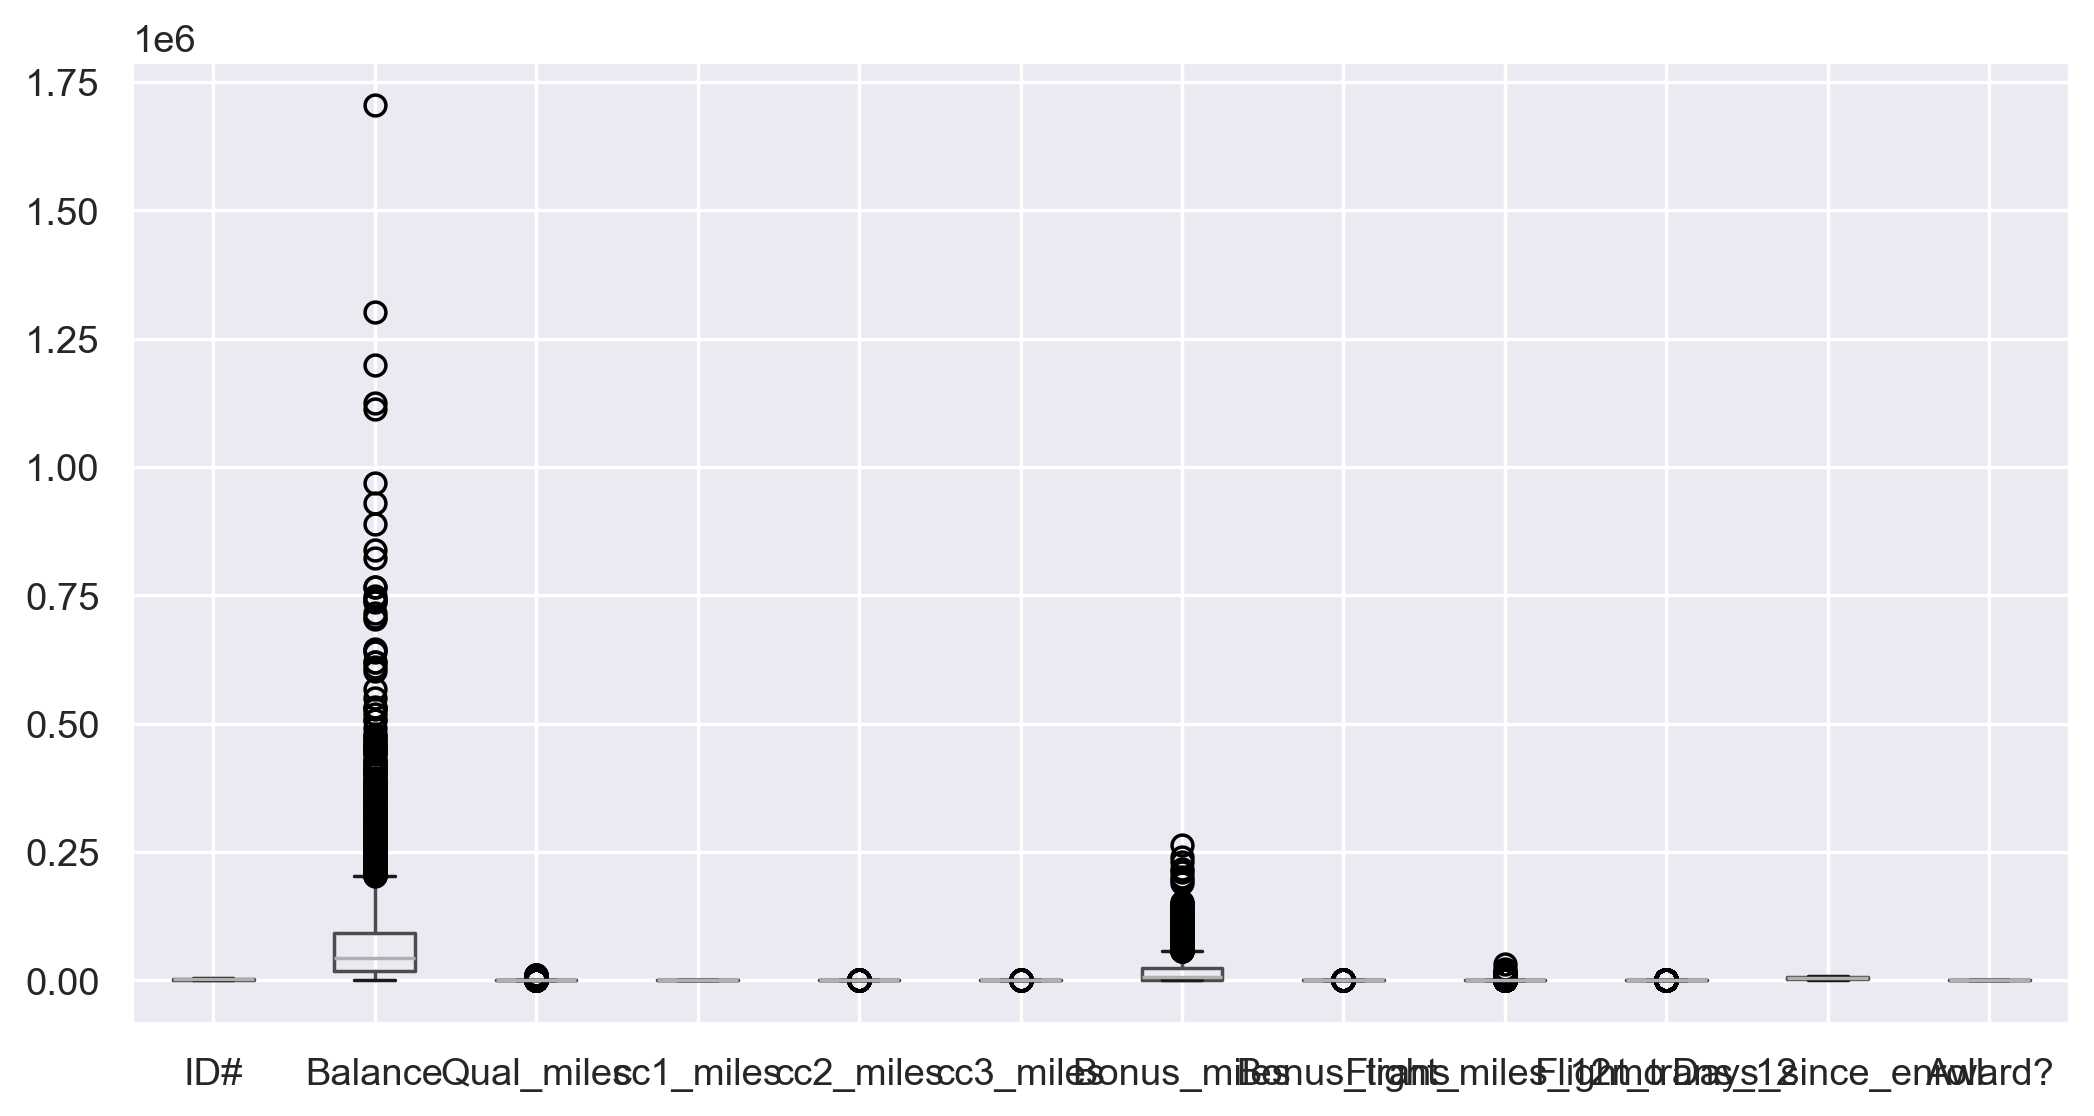

In [6]:
df.boxplot()

In [7]:
def replace_outliers_with_iqr_capping(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with capped values
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

In [8]:
df = replace_outliers_with_iqr_capping(df, 'Balance', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Qual_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'cc2_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'cc3_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Bonus_miles', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Bonus_trans', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Flight_miles_12mo', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Flight_trans_12', threshold=1.5)


<Axes: >

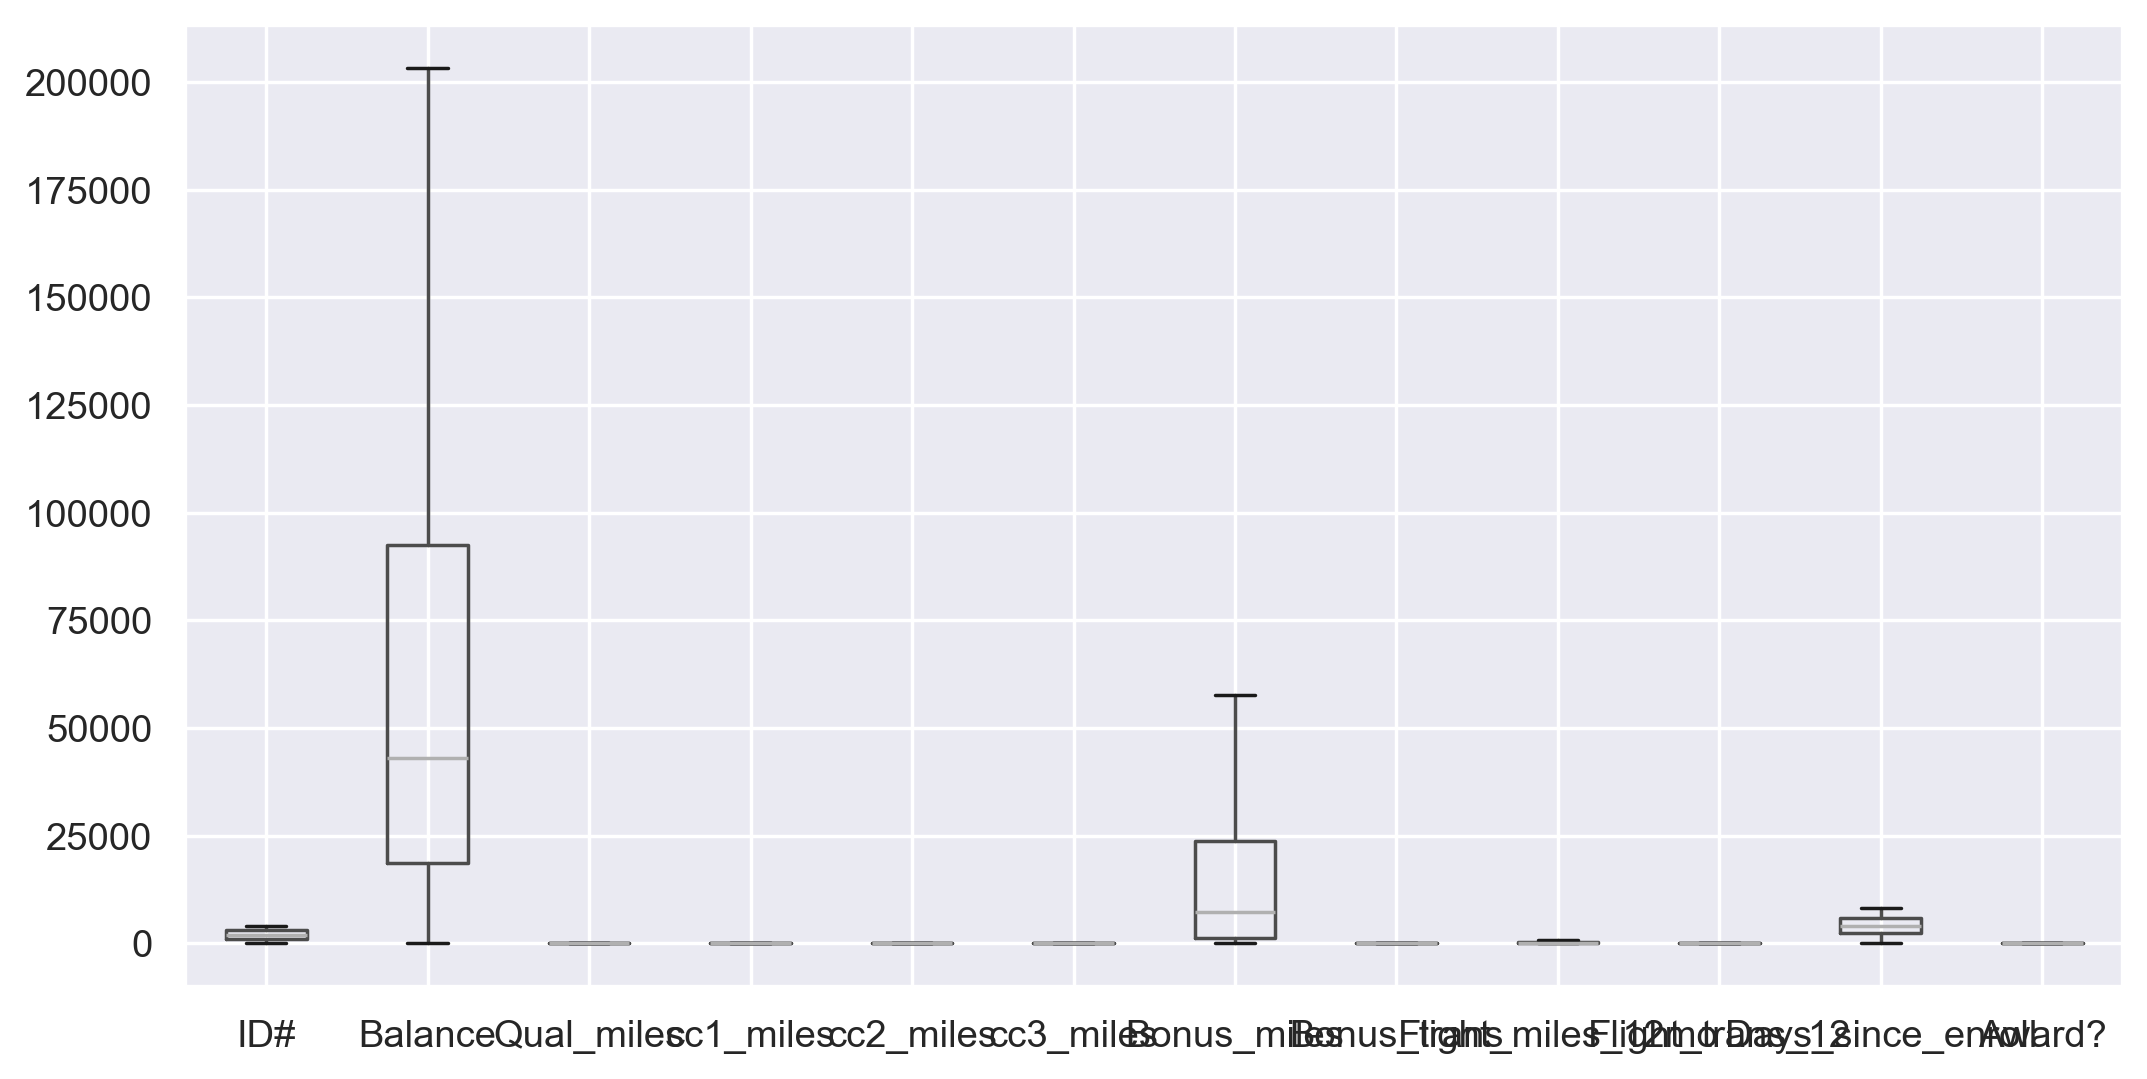

In [9]:
df.boxplot()

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [13]:
from scipy.cluster import hierarchy

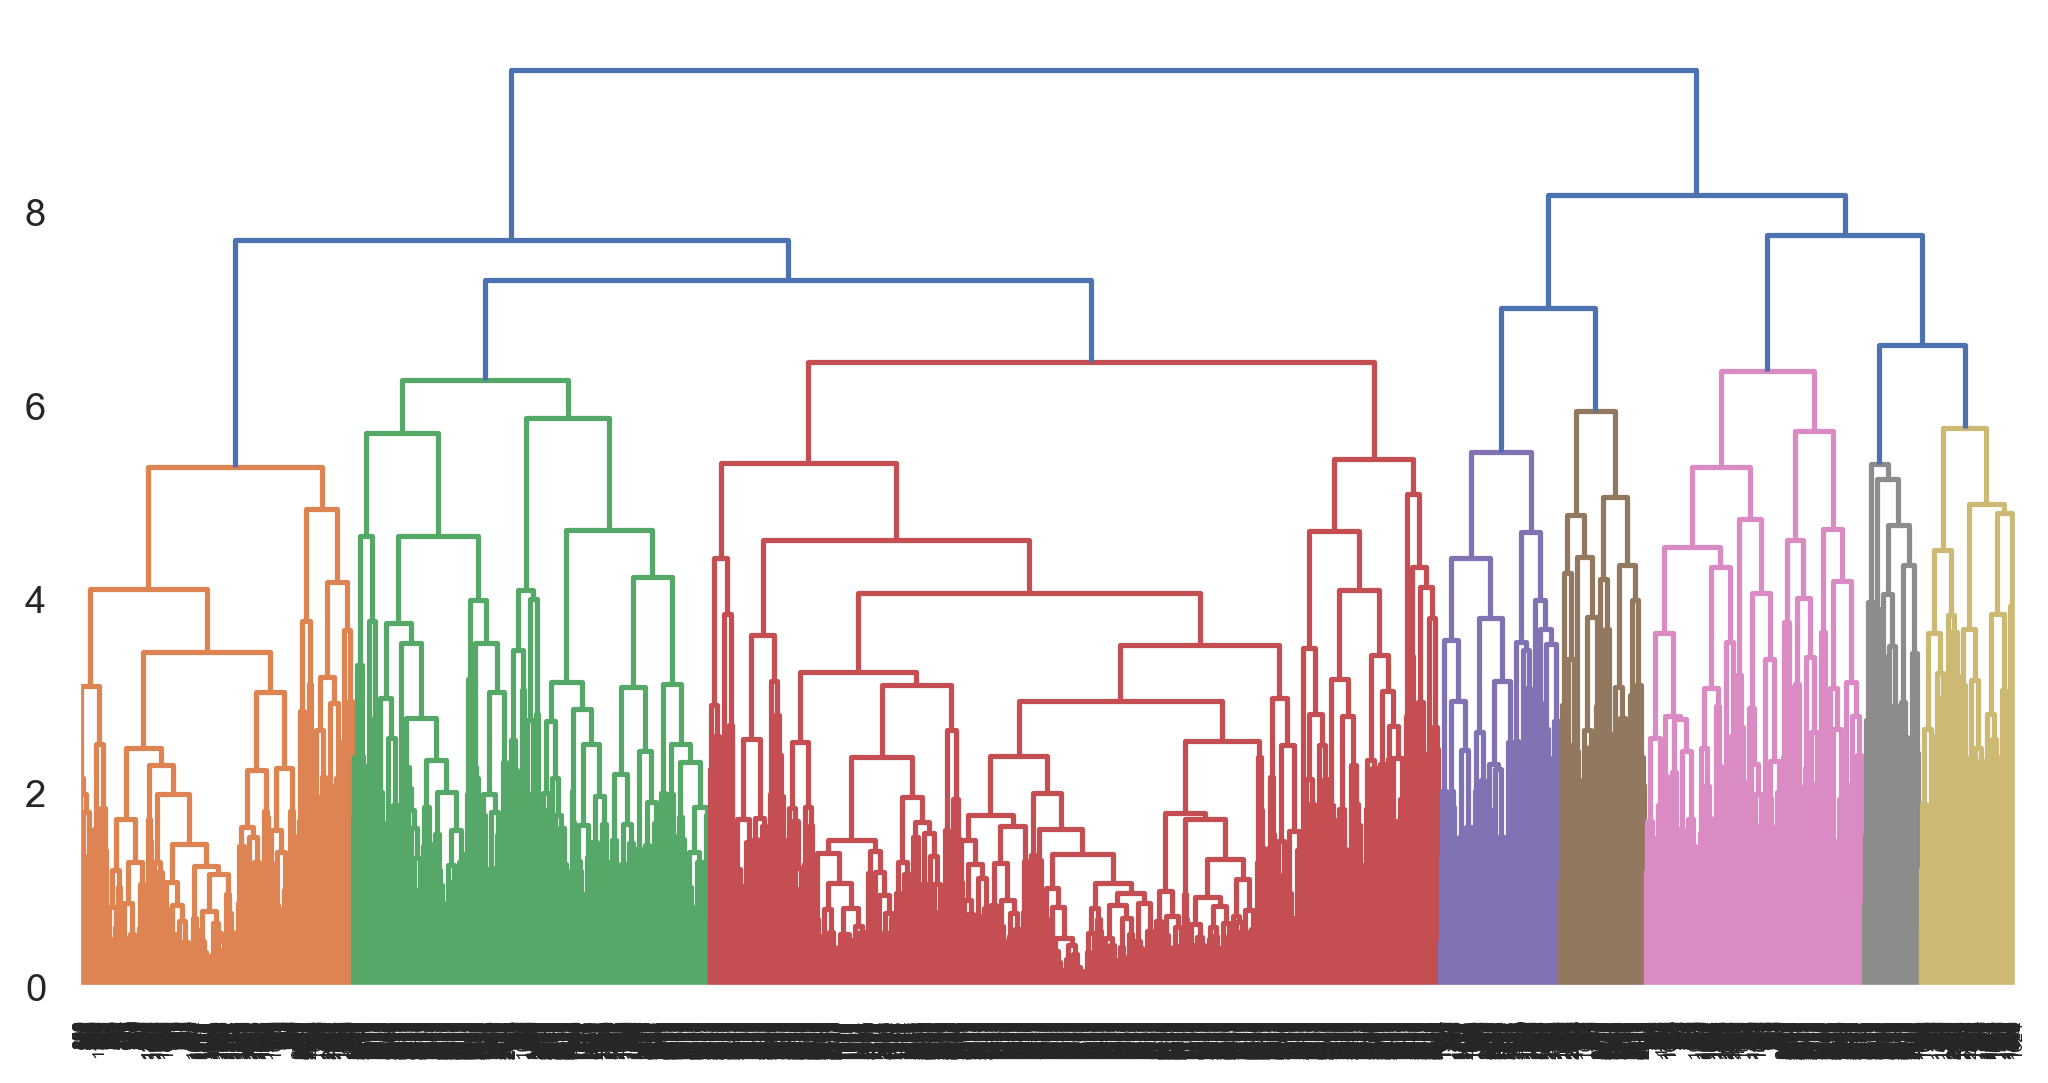

In [14]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc = AgglomerativeClustering(n_clusters=7)

ypred = hc.fit_predict(x)
ypred

array([5, 5, 5, ..., 1, 0, 3], dtype=int64)

In [17]:
df['cluster'] = ypred
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  cluster  
0          0        5  
1          0        5  
2          0        5  
3          0        5  
4          1        4  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        3  

[3999 rows x 13 columns]

In [18]:
df.groupby('cluster').agg('mean')

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
cluster                                                                 
0        1996.013761   76599.662080         0.0   1.186544        1.0   
1        1926.229687   55522.394531         0.0   1.828125        1.0   
2        1849.655983   89542.882479         0.0   4.168803        1.0   
3        3341.814527   27429.225681         0.0   1.309987        1.0   
4        1429.484429  115502.005190         0.0   4.058824        1.0   
5        1498.734772   38689.262690         0.0   1.071066        1.0   
6        1241.082262  109149.209512         0.0   3.372751        1.0   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
cluster                                                            
0              1.0   7505.288226    10.440367         612.091743   
1              1.0  10961.601562    10.556250          44.403125   
2              1.0  43335.618056    18.861111         149.011752   
3              1.0   5146.203956     7.888457           1.037613   
4              1.0  44937.384083    24.681661         688.487889   
5              1.0   2586.686548     5.257614           6.450508   
6              1.0  26811.370180    15.686375          22.429306   

         Flight_trans_12  Days_since_enroll    Award?  
cluster                                                
0               2.015291        4185.503058  0.449541  
1               0.185156        4304.706250  0.953125  
2               0.512821        4441.799145  0.739316  
3               0.009079        1753.178988  0.000000  
4               2.155709        5182.086505  0.799308  
5               0.023477        4986.126904  0.000000  
6               0.104113        5451.501285  0.000000

In [19]:
df[df['cluster']==0]

ID#    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
7        8   20856.00         0.0          1        1.0        1.0   
8        9  203218.75         0.0          3        1.0        1.0   
21      22  185681.00         0.0          1        1.0        1.0   
22      23   20584.00         0.0          1        1.0        1.0   
23      24   66275.00         0.0          1        1.0        1.0   
...    ...        ...         ...        ...        ...        ...   
3935  3958   33629.00         0.0          1        1.0        1.0   
3950  3973   59650.00         0.0          1        1.0        1.0   
3979  4002   57793.00         0.0          3        1.0        1.0   
3986  4009   34235.00         0.0          1        1.0        1.0   
3997  4020   54899.00         0.0          1        1.0        1.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
7          5250.0          4.0              250.0              1.0   
8          1753.0         38.0              777.5              2.5   
21        13300.0         16.0              777.5              2.5   
22         3450.0         11.0              777.5              2.5   
23         2533.0         11.0              150.0              1.0   
...           ...          ...                ...              ...   
3935       4970.0         10.0              150.0              1.0   
3950       5050.0         16.0              777.5              2.5   
3979      20959.0         15.0              777.5              2.5   
3986      18910.0          7.0              250.0              1.0   
3997        500.0          1.0              500.0              1.0   

      Days_since_enroll  Award?  cluster  
7                  6938       1        0  
8                  6948       1        0  
21                 6896       1        0  
22                 6884       0        0  
23                 6884       0        0  
...                 ...     ...      ...  
3935               1500       0        0  
3950               1476       0        0  
3979               1424       1        0  
3986               1415       0        0  
3997               1401       0        0  

[654 rows x 13 columns]

In [20]:
df[df['cluster']==1]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
17      18  13958.0         0.0          1        1.0        1.0       4291.0   
18      19  91473.0         0.0          3        1.0        1.0      27408.0   
19      20  23354.0         0.0          3        1.0        1.0      10447.0   
28      29  59763.0         0.0          3        1.0        1.0      33772.0   
38      39  59990.0         0.0          3        1.0        1.0      27878.0   
...    ...      ...         ...        ...        ...        ...          ...   
3987  4010  11933.0         0.0          1        1.0        1.0        249.0   
3989  4012   2622.0         0.0          1        1.0        1.0       1625.0   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
17            5.0                0.0              0.0               6905   
18           17.0                0.0              0.0               6903   
19            5.0                0.0              0.0               6896   
28           20.0              100.0              1.0               7907   
38           17.0                0.0              0.0               7854   
...           ...                ...              ...                ...   
3987          3.0               79.0              1.0               1412   
3989          6.0                0.0              0.0               1404   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   

      Award?  cluster  
17         1        1  
18         1        1  
19         1        1  
28         1        1  
38         1        1  
...      ...      ...  
3987       1        1  
3989       1        1  
3994       1        1  
3995       1        1  
3996       1        1  

[640 rows x 13 columns]

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred)

0.18579465657940664